In [1]:
import sys
sys.path.append("./../utils/")
sys.path.append("./../")
from sklearn.preprocessing import StandardScaler
from datetime import datetime

#Modules of src folder
from tools import dotdict
import run_non_deepl
%matplotlib inline

In [2]:
args = dotdict({})
args.model_params = dotdict({})
args.train_params = dotdict({})

args.experiment_name = "Exp0"

# Data loading
args.from_raw = True
args.file_name = 'smard_data.csv'#"ts_60_sindex_DE_3f.csv"

from_raw_folder = "raw" if args.from_raw else "preproc_non_deepl"
args.path = f"./../data/{from_raw_folder}/{args.file_name}"

# Preprocessing
args.scaler_name = "std"
args.scaler = {"std":StandardScaler()}[args.scaler_name]

# Model and its hyperparameters
args.model_name = "dummy"
args.model_params = None
args.train_params = None

# Prediction
args.forecast_setting = "both"
args.cols_to_lag = ['load', 'solar_gen', 'wind_gen']
args.targets = [["load"], ["load", "solar_gen", "wind_gen"], ['load'], ['solar_gen'], ['wind_gen'], ]
args.window_size = 96
args.stride = 24 # Has to be <= min(window_size, forecast_horizon) and stride * integer = window_size,
# and stride * integer2 = forecast_horizon, for 24 it is perfect for dummy
args.lead_time = 0 # TODO: Not working yet
args.forecast_horizons = [24, 48, 96, 192, 336, 720]

# Plotting
args.plot = True
args.plot_date = '2021-07-01'
args.days = 10

# Save model
args.save_model = False
args.save_benchmark = True
args.date_time = datetime.now().strftime("%m-%d-%H")

------- Starting to train ftboth dummy on ['load'] for horizons [24, 48, 96, 192, 336, 720] ----------


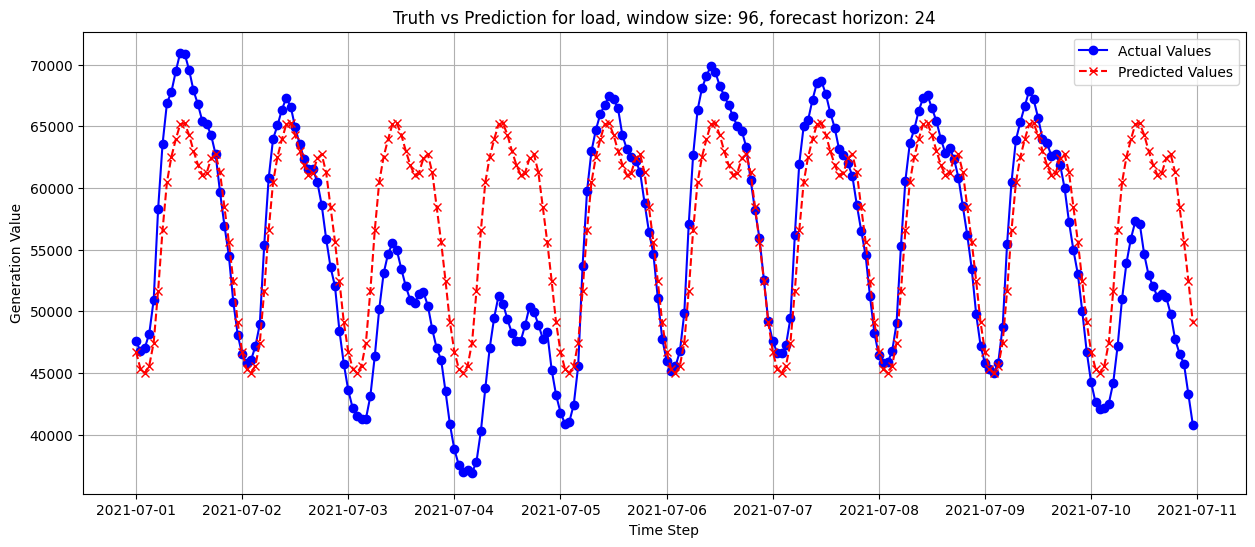

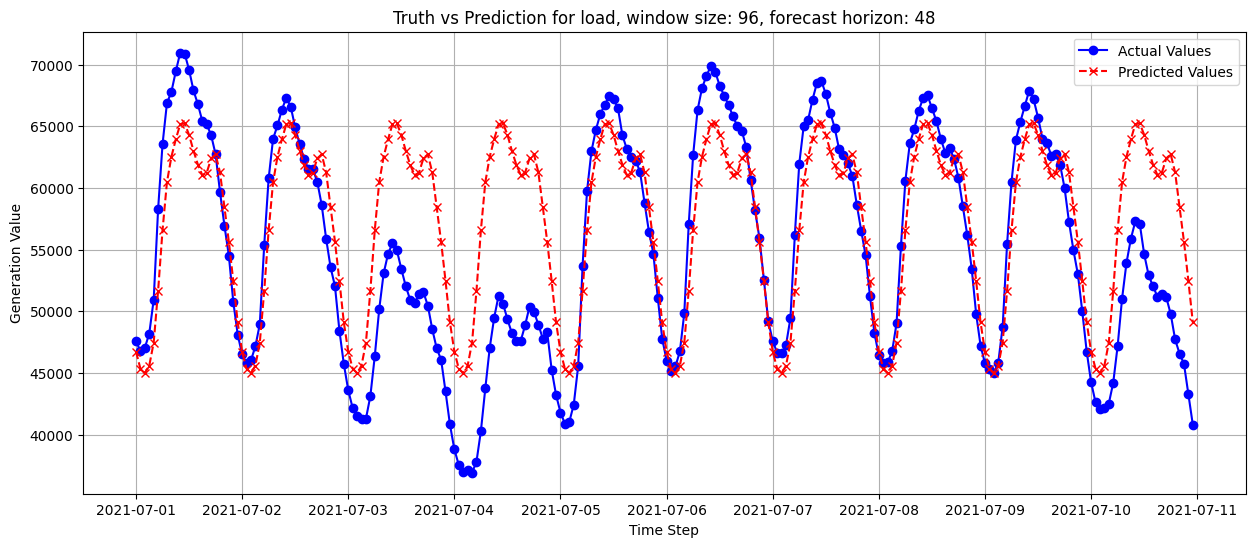

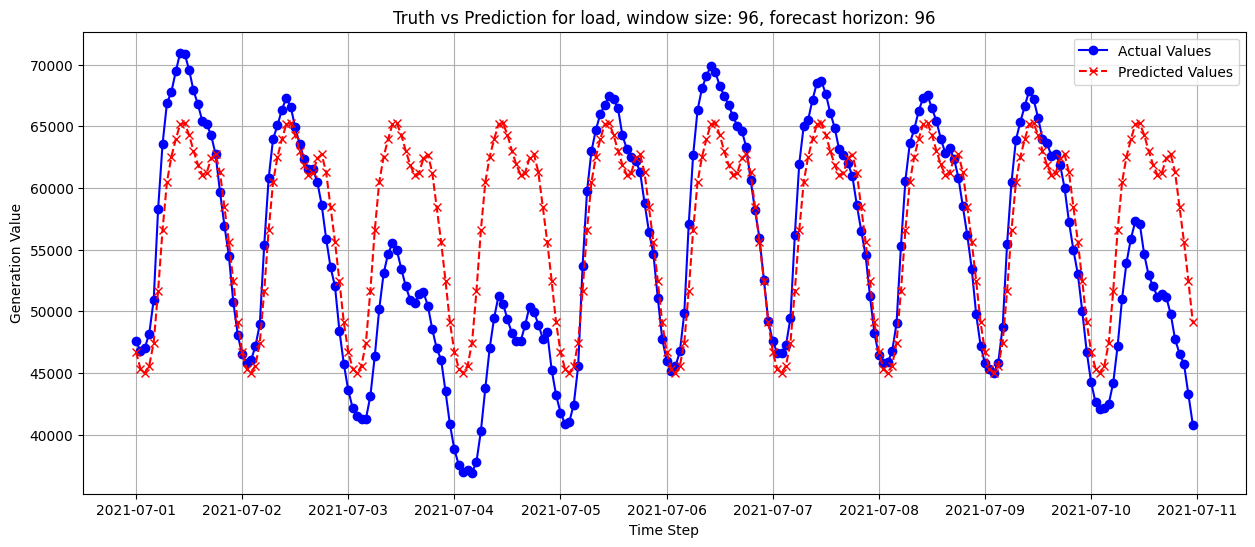

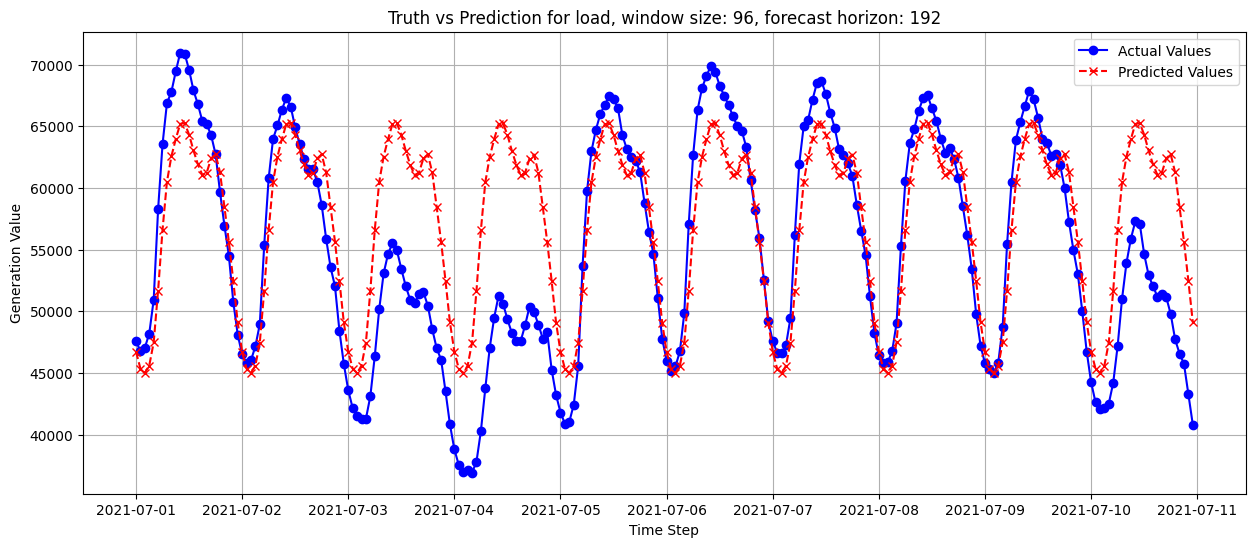

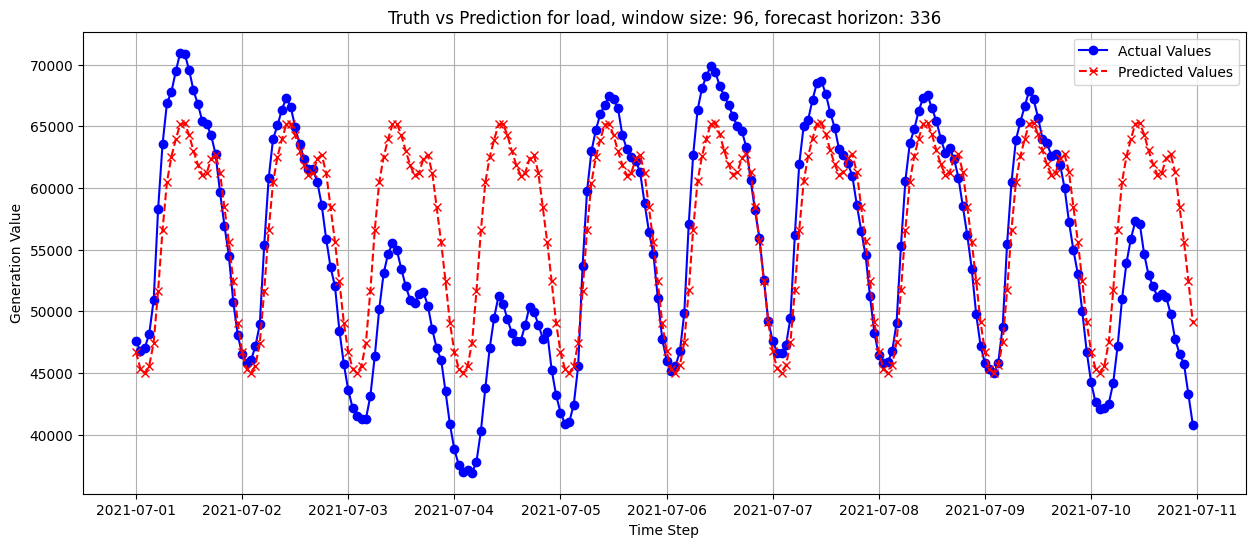

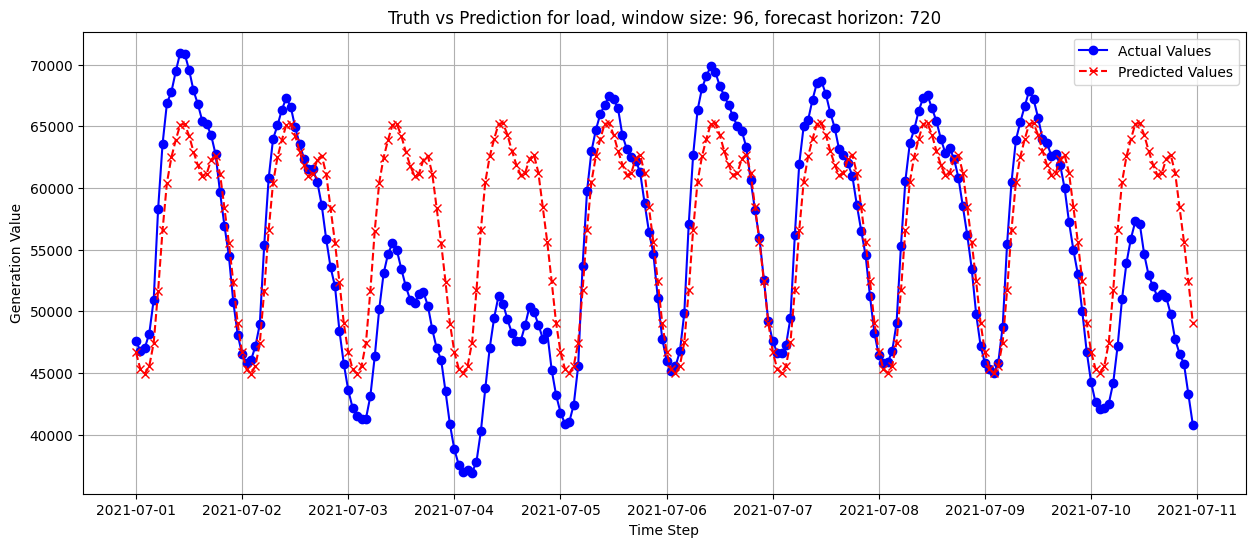

------- Starting to train ftboth dummy on ['load', 'solar_gen', 'wind_gen'] for horizons [24, 48, 96, 192, 336, 720] ----------


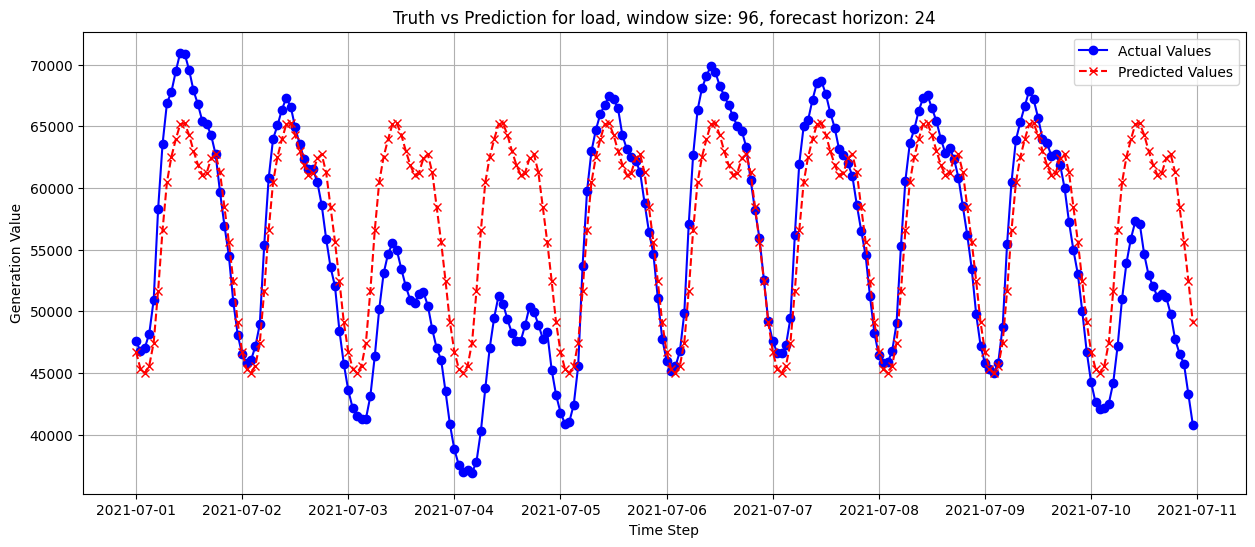

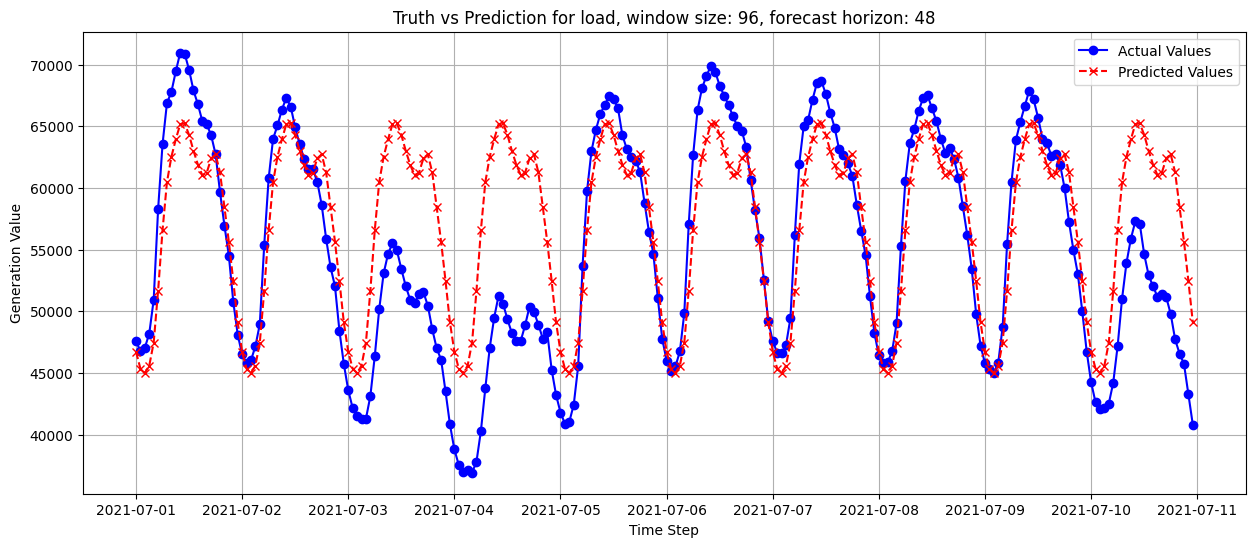

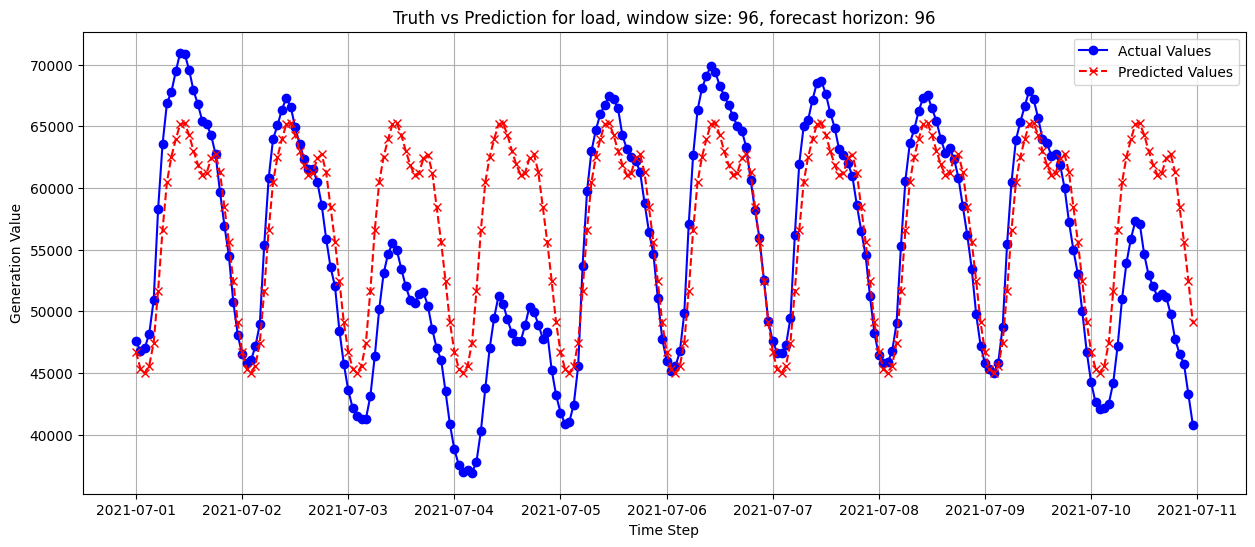

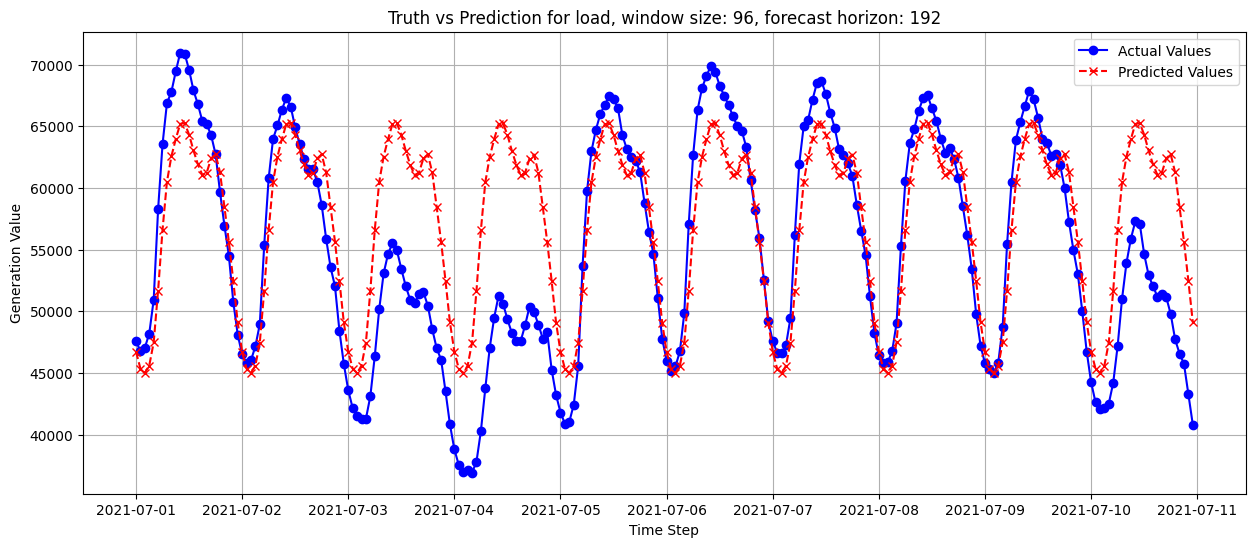

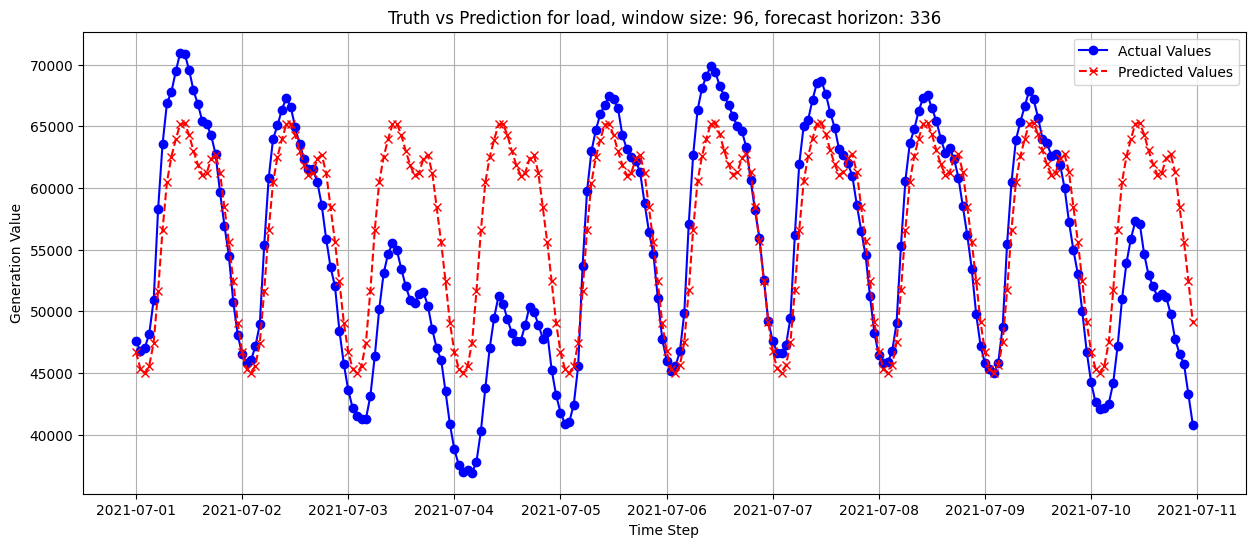

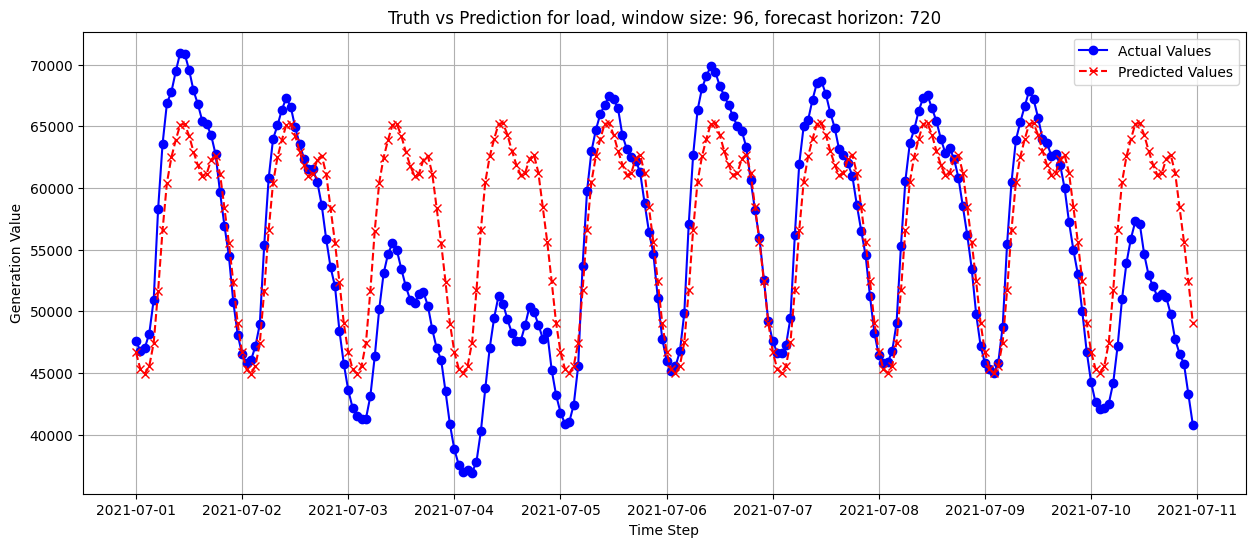

------- Starting to train ftboth dummy on ['load'] for horizons [24, 48, 96, 192, 336, 720] ----------


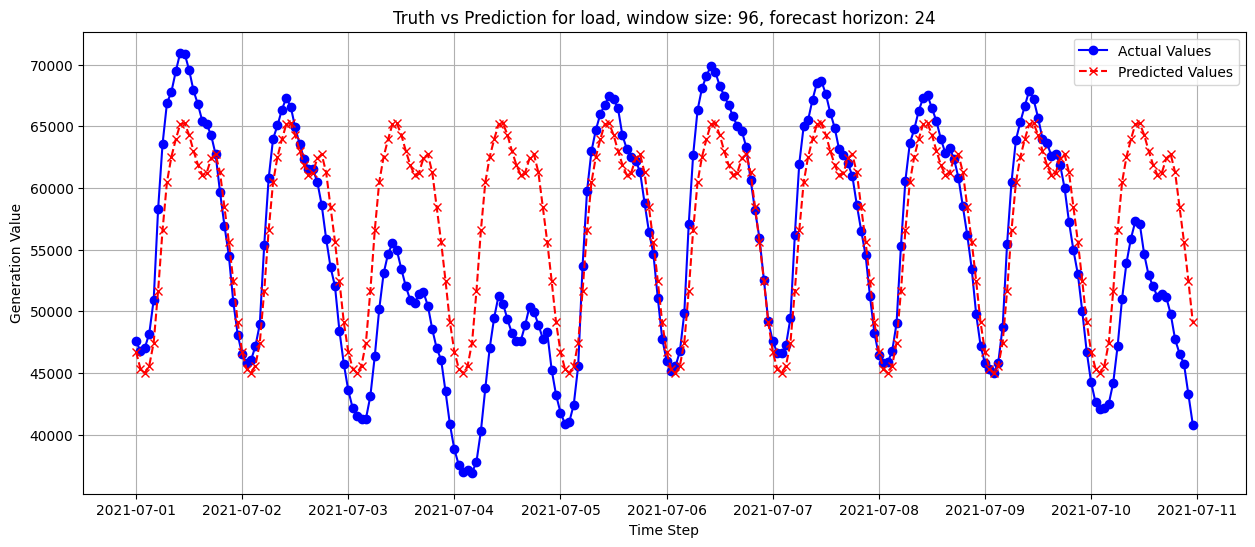

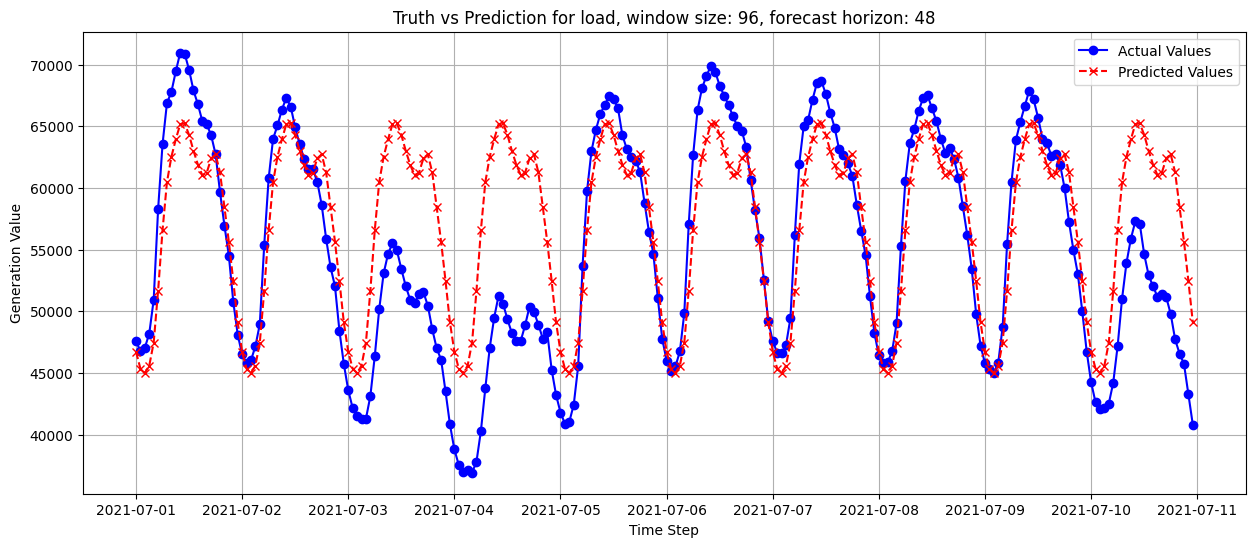

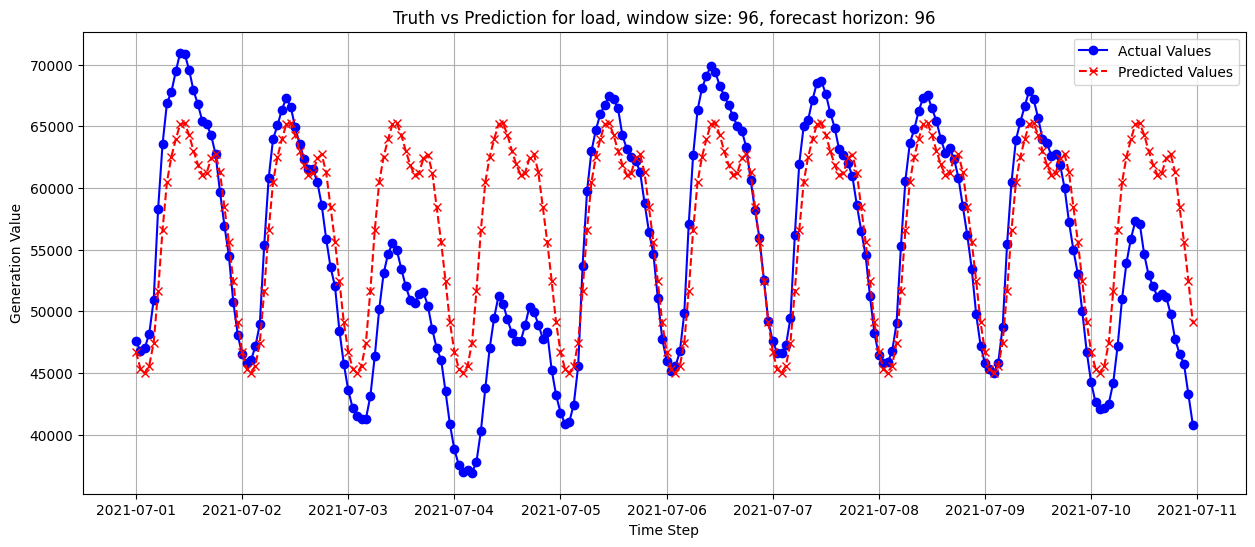

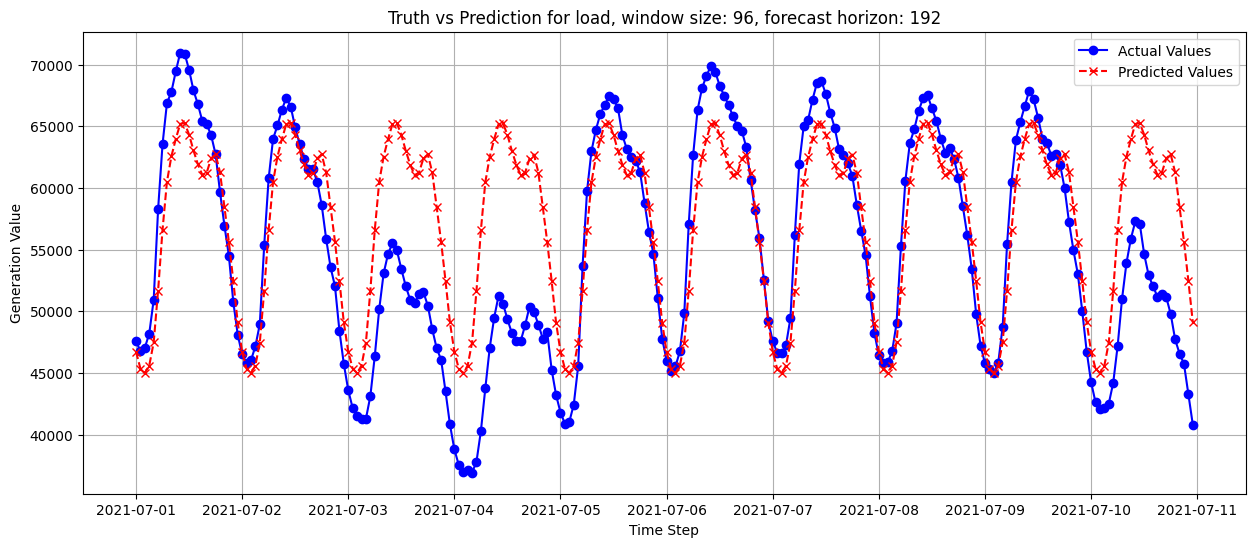

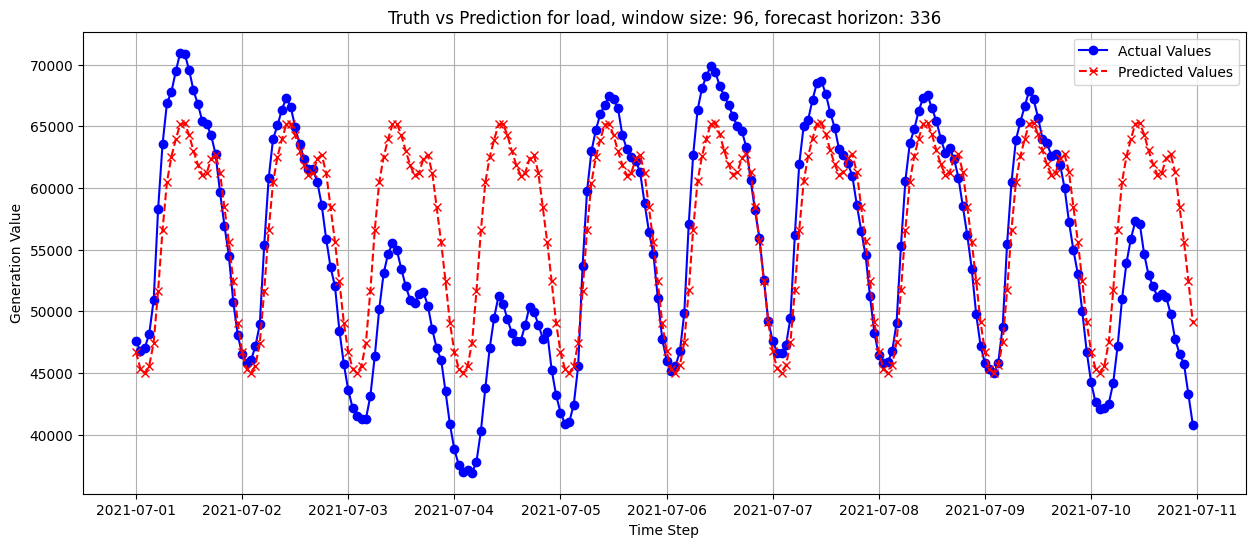

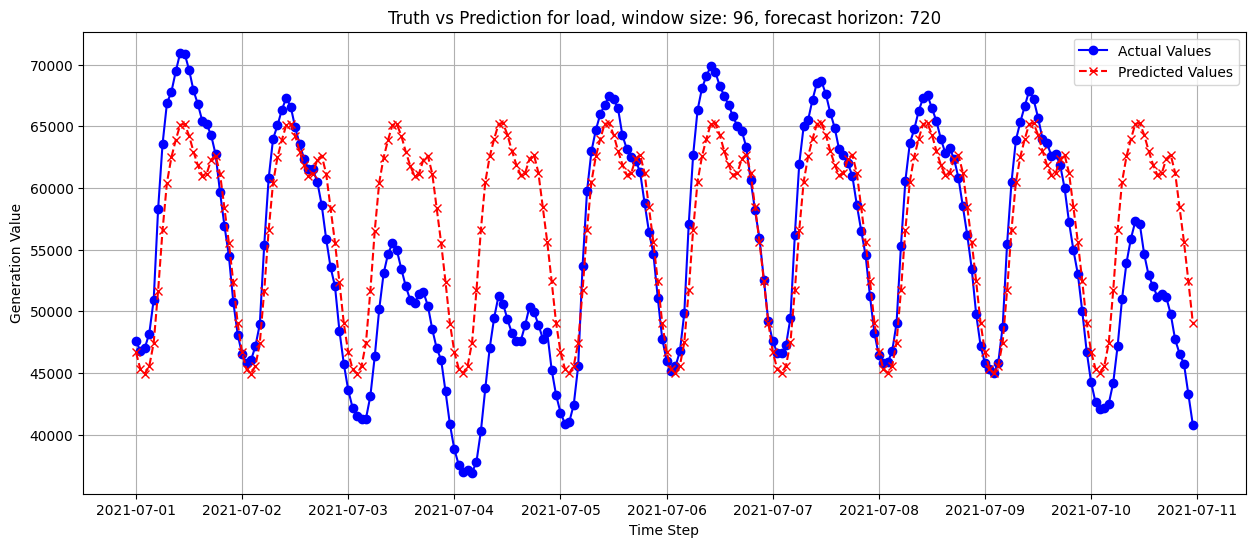

------- Starting to train ftboth dummy on ['solar_gen'] for horizons [24, 48, 96, 192, 336, 720] ----------


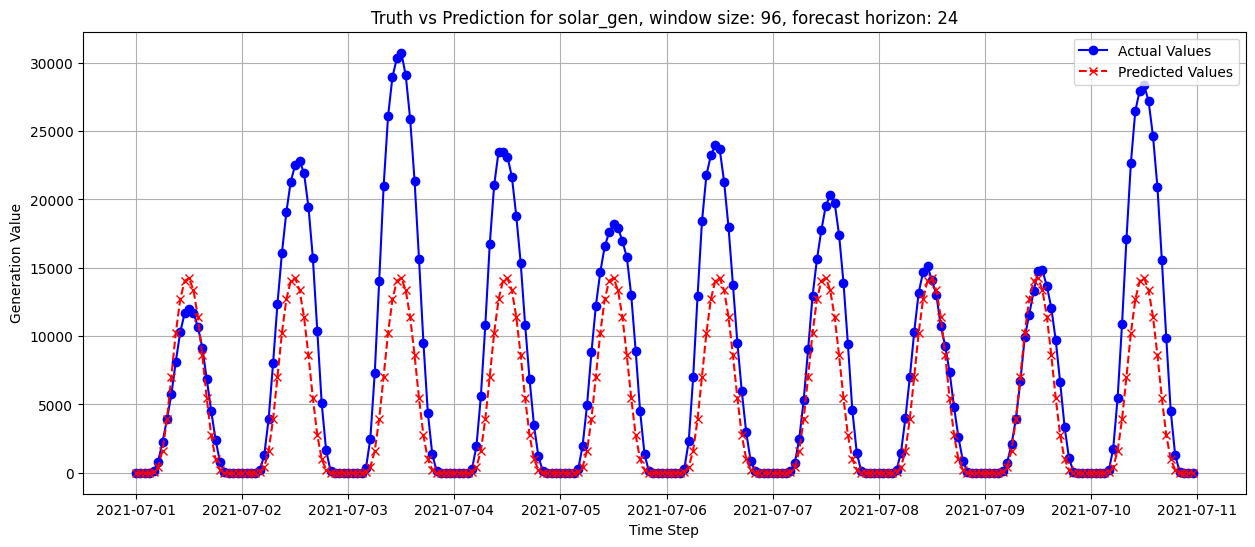

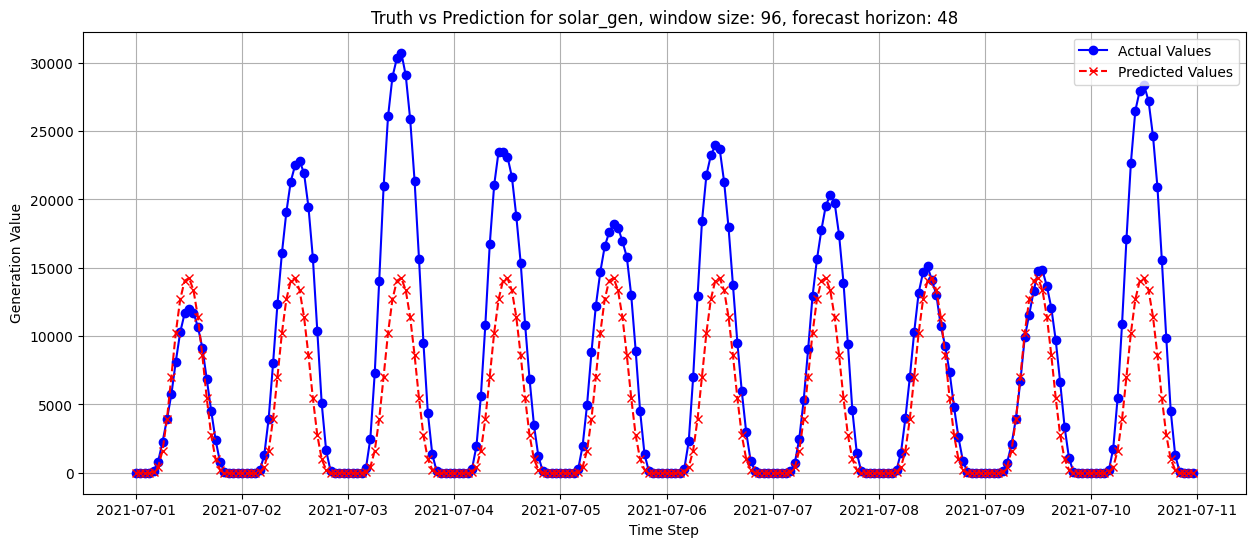

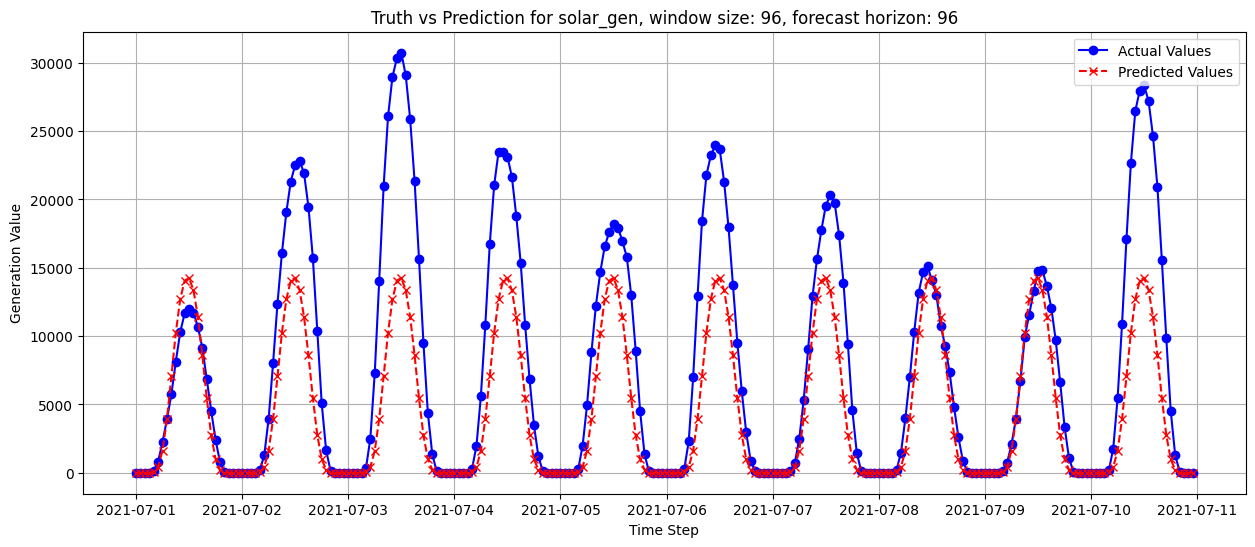

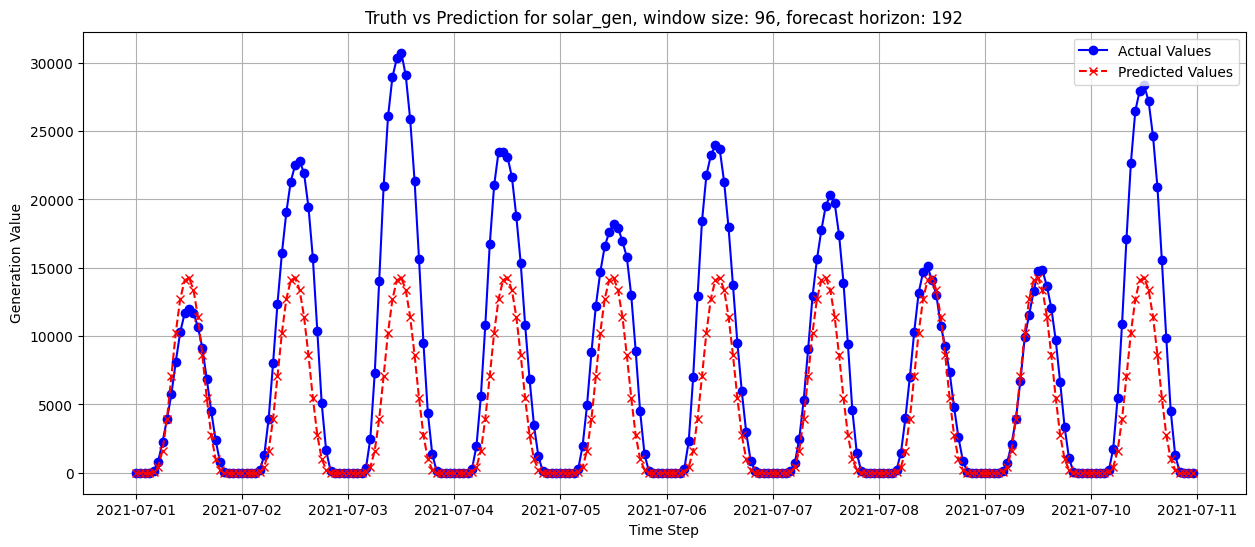

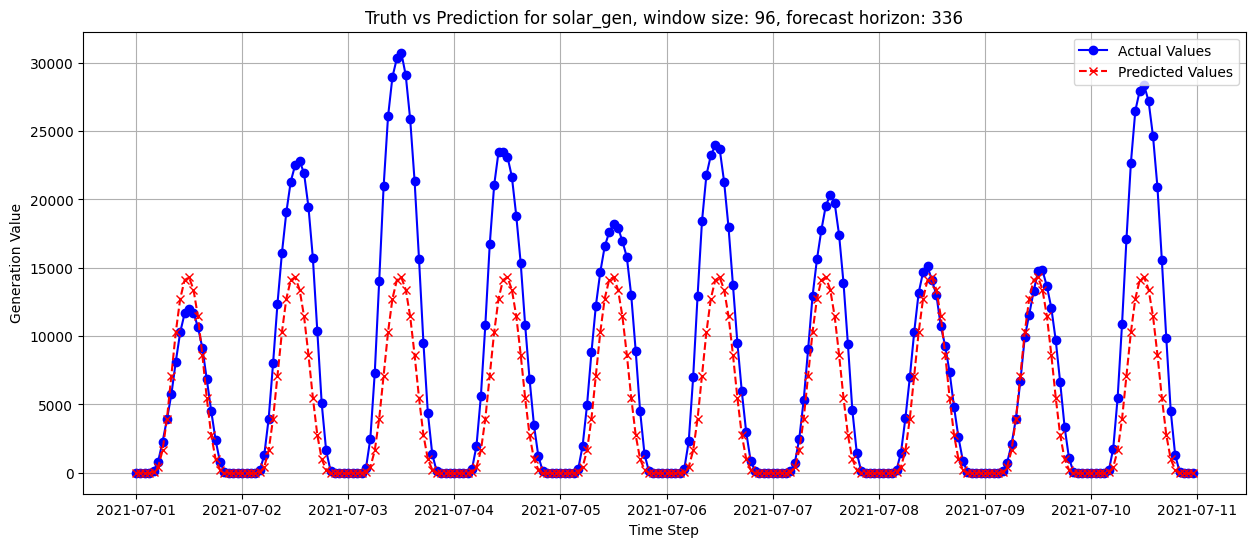

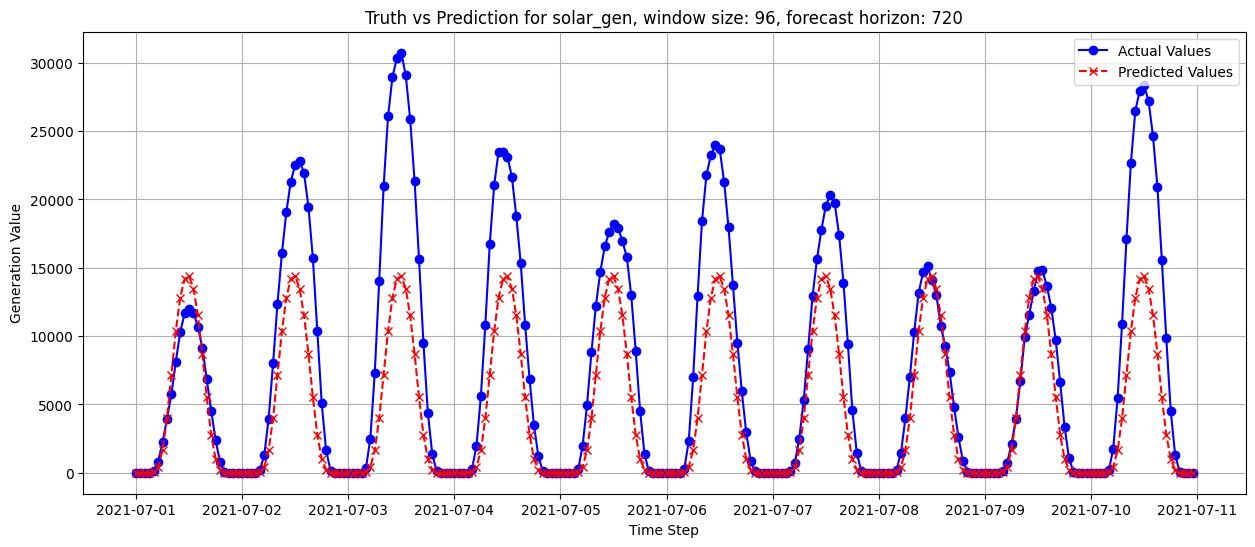

------- Starting to train ftboth dummy on ['wind_gen'] for horizons [24, 48, 96, 192, 336, 720] ----------


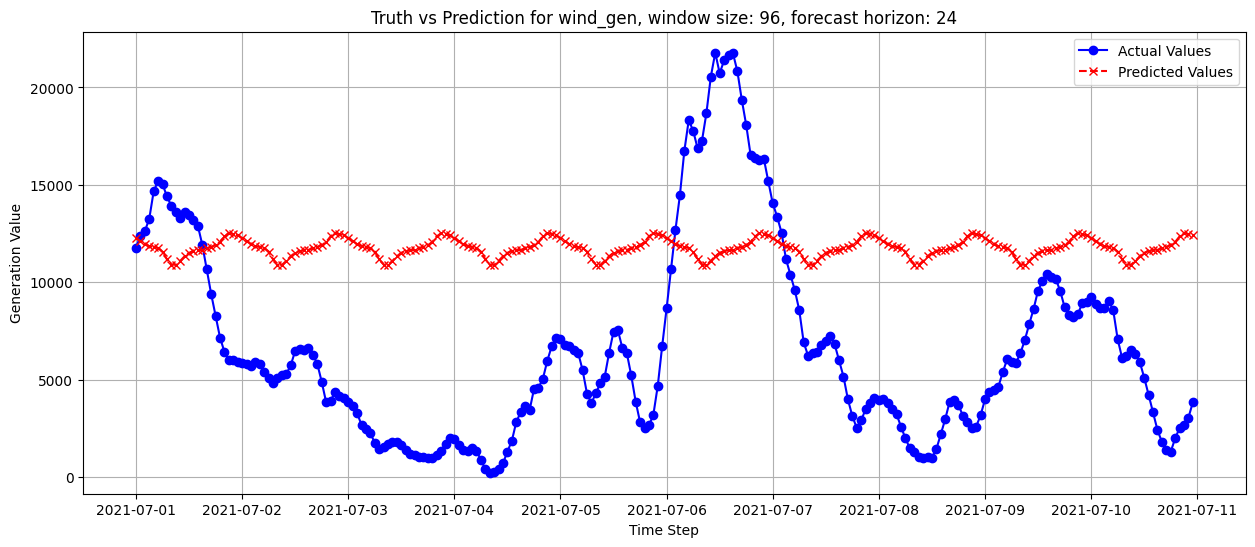

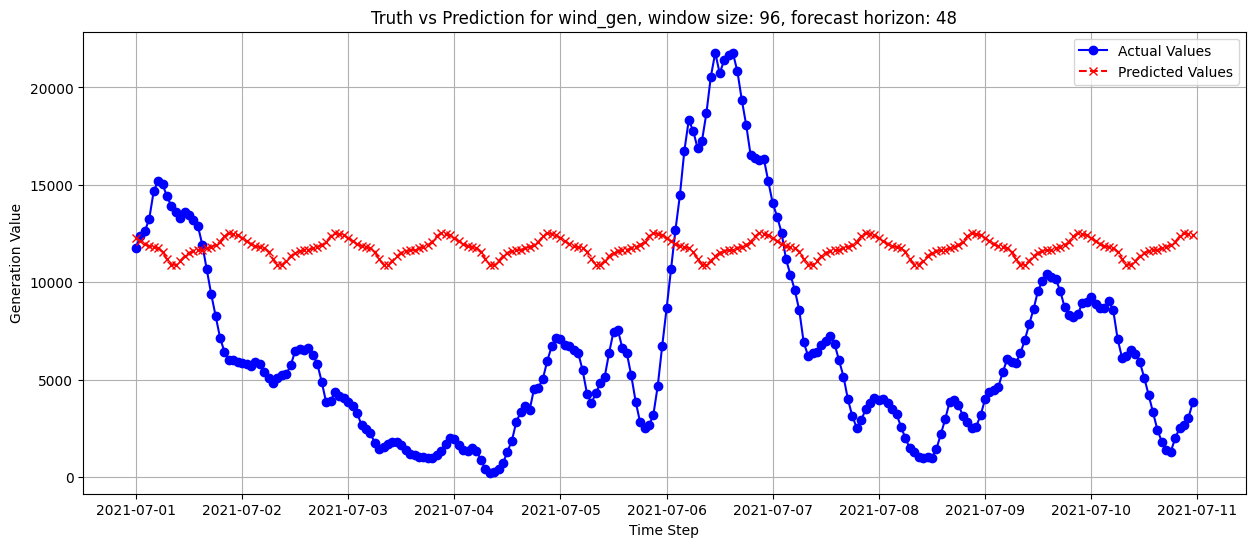

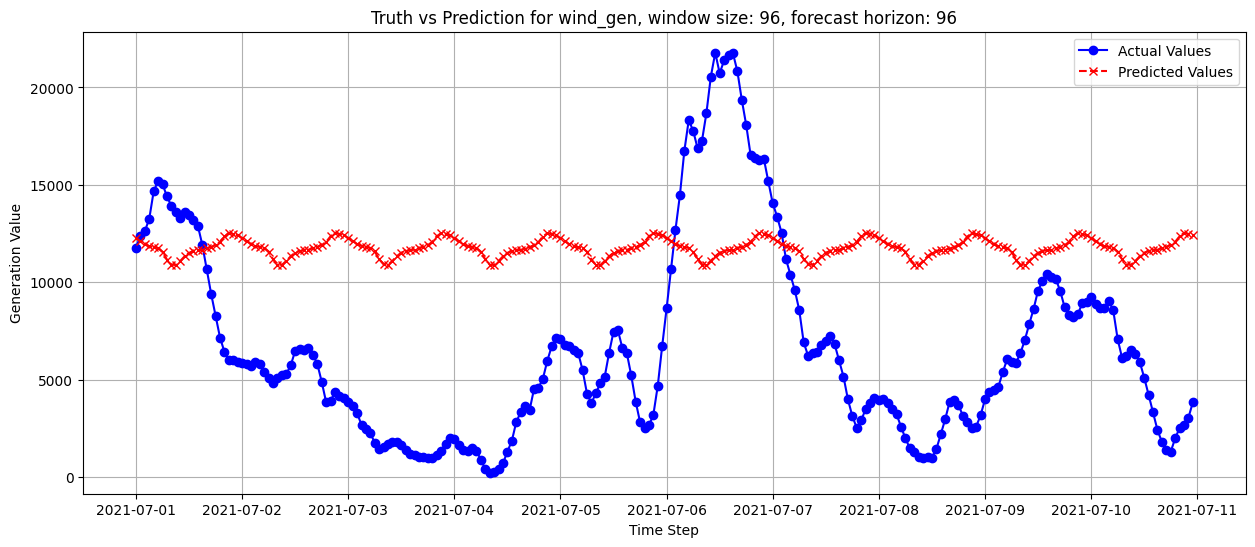

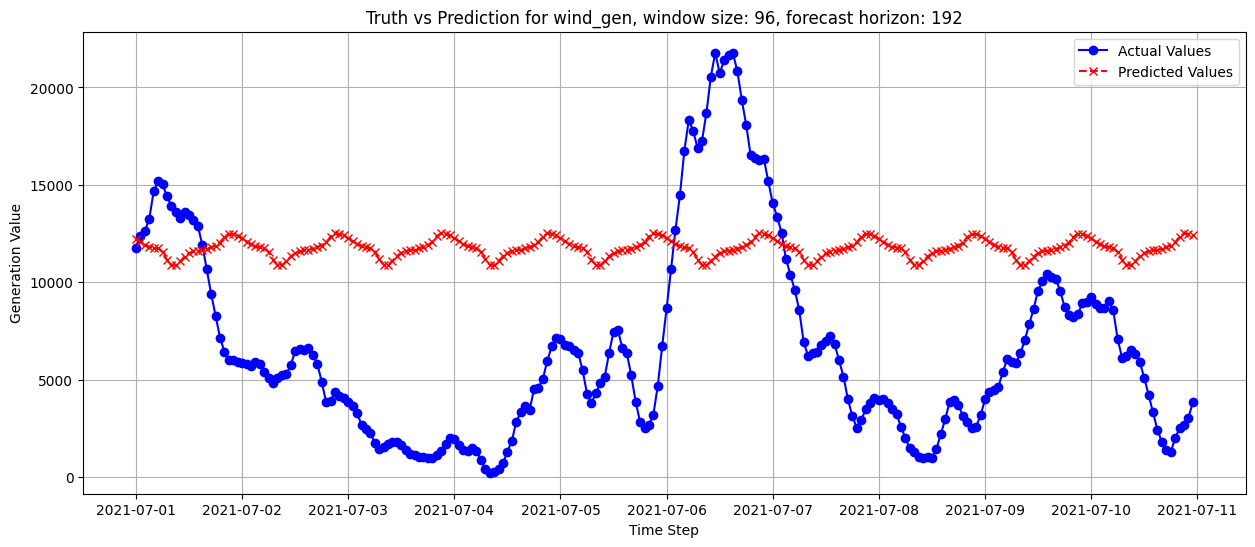

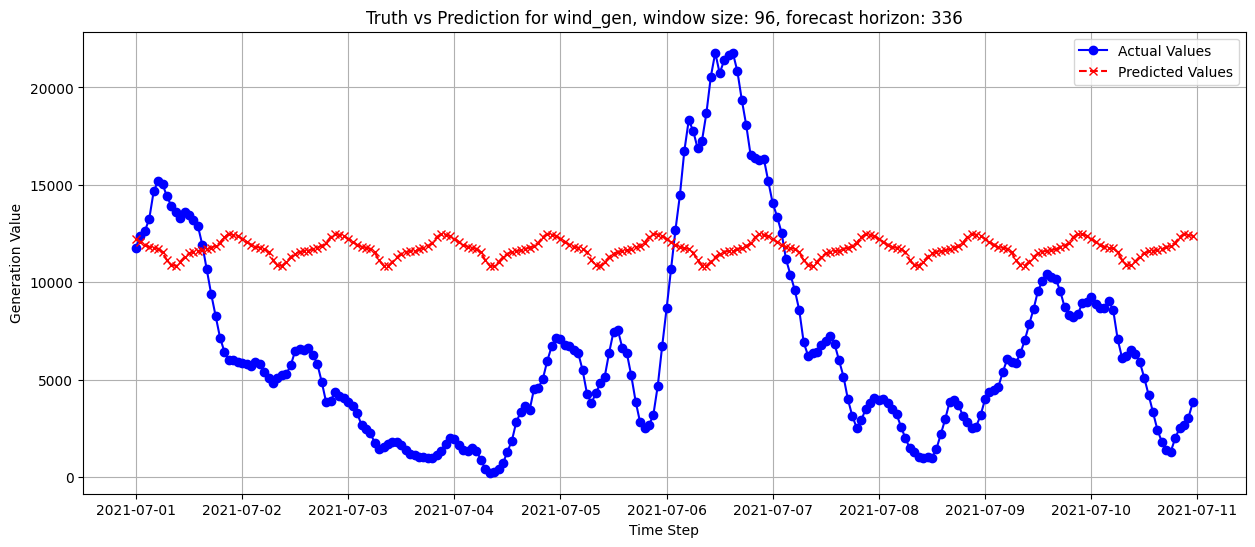

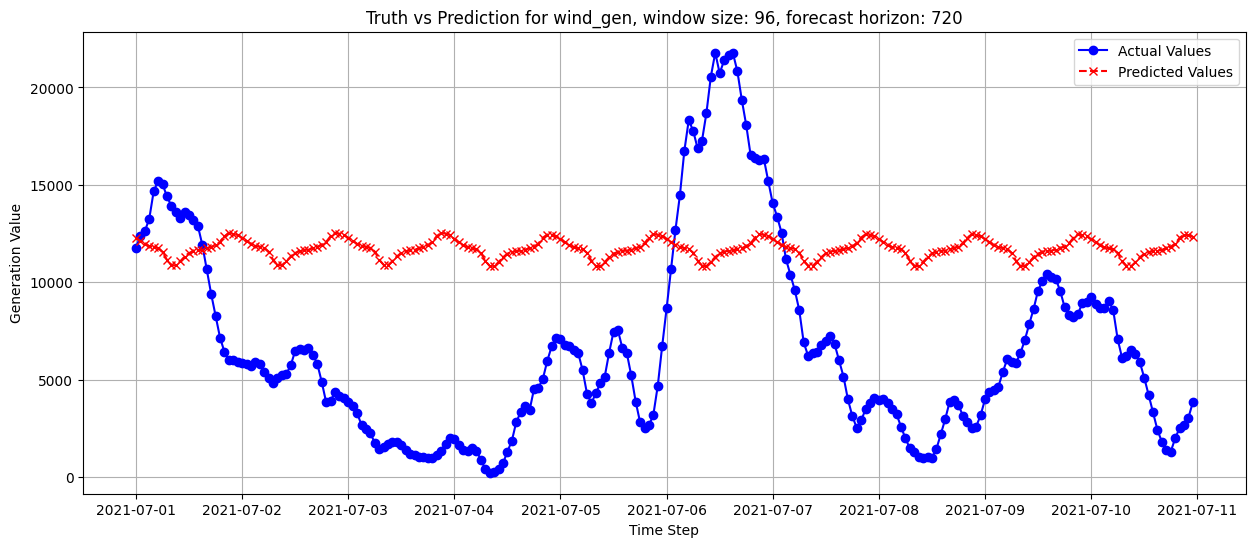

                        mae       mse
target    horizon                    
load      24       0.549392  0.455228
          48       0.549133  0.455172
          96       0.549594  0.456101
          192      0.550459  0.457500
          336      0.548652  0.455347
          720      0.541907  0.447807
          24       0.615618  0.746687
          48       0.614971  0.744931
          96       0.614303  0.742703
          192      0.614039  0.742761
          336      0.611914  0.739535
          720      0.606592  0.729103
          24       0.549392  0.455228
          48       0.549133  0.455172
          96       0.549594  0.456101
          192      0.550459  0.457500
          336      0.548652  0.455347
          720      0.541907  0.447807
solar_gen 24       0.460572  0.613685
          48       0.460435  0.613599
          96       0.459791  0.612596
          192      0.458562  0.610924
          336      0.457163  0.609485
          720      0.453242  0.605749
wind_gen  24

In [3]:
run_non_deepl.pipeline(args)